In [1]:
import numpy as np
import pandas as pd
import dataframe_image as dfi # for saving styled data frame print-out table as png
import seaborn as sns 
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

## Analyze Top WBTC-WETH Uniswap V3 Pools 

This table of [Top Pools](https://revert.finance/#/top-positions?sort=underlying_value&underlying-value-from=20000&apr-from=20&token1=0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2&token0=0x2260fac5e5542a773aa44fbcfedf7c193bc2c599&age-from=14)
was scraped from revert finance. Check out the [scraping script](https://github.com/coindataschool/mixture/blob/main/notebook/univ3_wbtc_weth_top_positions_01_scrape_data.ipynb).

In [2]:
df = pd.read_csv('../data/univ3_wbtc_weth_lp_top_positions.csv')\
       .drop(columns=['Unnamed: 0', 'url'])
df['APR'] = df.APR/100
df['fee_APR'] = df.fee_APR/100
df

,pool_fees,PnL,APR,fee_APR,value,age,price_lwr,price_upr
0,0.30%,"85,084.1400",0.2030,0.2039,"2,804,470.2800",54.5000,11.5061,15.1631
1,0.30%,"142,183.5900",0.6714,0.3743,"822,076.0200",76.1000,12.1445,13.6928
2,0.30%,"40,051.5300",0.2746,0.2754,"814,482.3700",69.5000,13.6108,15.9086
3,0.30%,"37,183.8500",0.2396,0.2399,"756,293.9600",74.9000,13.0511,15.3461
4,0.30%,"162,142.6400",0.2068,0.2095,"731,351.5100",460.3000,12.1445,16.1975
5,0.30%,"33,903.5000",0.2386,0.2396,"692,087.8000",74.9000,13.0511,15.3461
6,0.30%,"12,674.2100",0.8756,0.9174,"657,723.0300",15.2000,12.3650,14.5394
7,0.30%,"19,732.6900",0.2082,0.2096,"629,284.5000",55.0000,11.7151,15.6248
8,0.30%,"18,400.4800",0.2065,0.2143,"463,959.9000",87.0000,11.3008,15.2543
9,0.30%,"22,634.5900",0.2063,0.2599,"356,716.9300",110.4000,12.0718,15.9086


In [3]:
df['pool_fees'].value_counts()

0.30%    25
0.05%     6
Name: pool_fees, dtype: int64

### Age & APR by Pool Type

In [4]:
ha = df.groupby('pool_fees')[['age', 'fee_APR', 'APR']].aggregate(['min']) 
dfi.export(ha, '../png/min_age_apr_by_pool_type.png')

[1118/082259.925050:INFO:headless_shell.cc(657)] Written to file /var/folders/qq/v47zfw7s1kn38gw67q4v194r0000gn/T/tmpjyk7ql9q/temp.png.


In [5]:
ha = df.groupby('pool_fees')[['age', 'fee_APR', 'APR']].aggregate(['median'])
dfi.export(ha, '../png/med_age_apr_by_pool_type.png')

[1118/082300.697315:INFO:headless_shell.cc(657)] Written to file /var/folders/qq/v47zfw7s1kn38gw67q4v194r0000gn/T/tmp26ilc4nu/temp.png.


In [6]:
ha = df.groupby('pool_fees')[['age', 'fee_APR', 'APR']].aggregate(['max'])
dfi.export(ha, '../png/max_age_apr_by_pool_type.png')

[1118/082301.466608:INFO:headless_shell.cc(657)] Written to file /var/folders/qq/v47zfw7s1kn38gw67q4v194r0000gn/T/tmpnk5m925h/temp.png.


### Price Range by Pool Type

In [7]:
ha = df.groupby('pool_fees')[['price_lwr', 'price_upr']].aggregate(['min', 'median', 'max'])
dfi.export(ha, '../png/price_rng_by_pool_type.png')

[1118/082302.230605:INFO:headless_shell.cc(657)] Written to file /var/folders/qq/v47zfw7s1kn38gw67q4v194r0000gn/T/tmprjm0rdaw/temp.png.


### Explore the relationship between APR, age, and price range

In [8]:
df['log_apr'] = np.log(df['APR'])
df['log_age'] = np.log(df['age'])
df['width'] = df.price_upr - df.price_lwr
df.head()

,pool_fees,PnL,APR,fee_APR,value,age,price_lwr,price_upr,log_apr,log_age,width
0,0.30%,"85,084.1400",0.2030,0.2039,"2,804,470.2800",54.5000,11.5061,15.1631,-1.5945,3.9982,3.6570
1,0.30%,"142,183.5900",0.6714,0.3743,"822,076.0200",76.1000,12.1445,13.6928,-0.3984,4.3320,1.5483
2,0.30%,"40,051.5300",0.2746,0.2754,"814,482.3700",69.5000,13.6108,15.9086,-1.2924,4.2413,2.2978
3,0.30%,"37,183.8500",0.2396,0.2399,"756,293.9600",74.9000,13.0511,15.3461,-1.4288,4.3162,2.2950
4,0.30%,"162,142.6400",0.2068,0.2095,"731,351.5100",460.3000,12.1445,16.1975,-1.5760,6.1319,4.0530


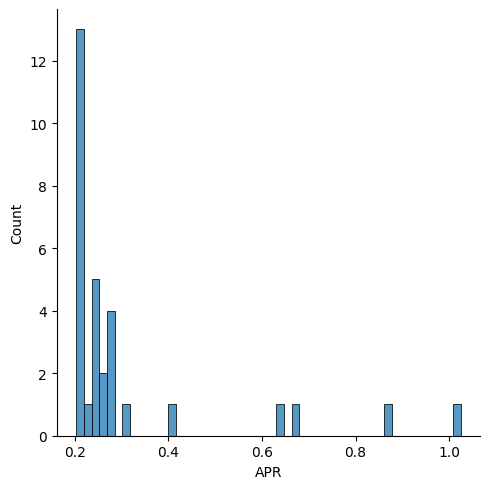

In [9]:
sns.displot(data=df, x='APR', bins=50);

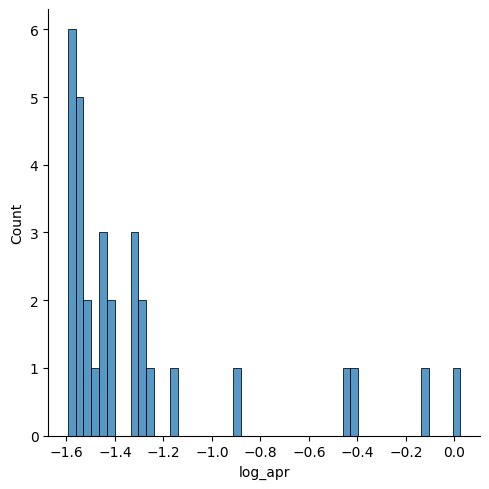

In [10]:
sns.displot(data=df, x='log_apr', bins=50);

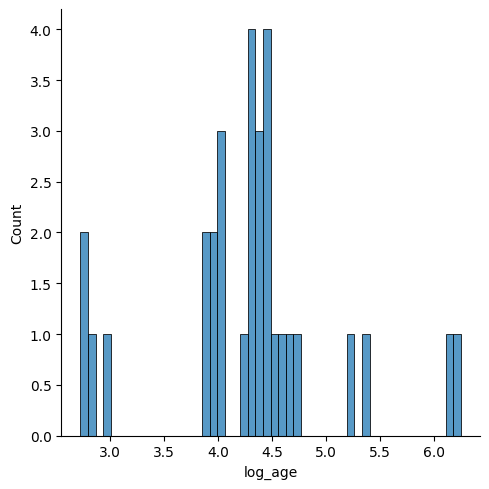

In [11]:
sns.displot(data=df, x='log_age', bins=50);

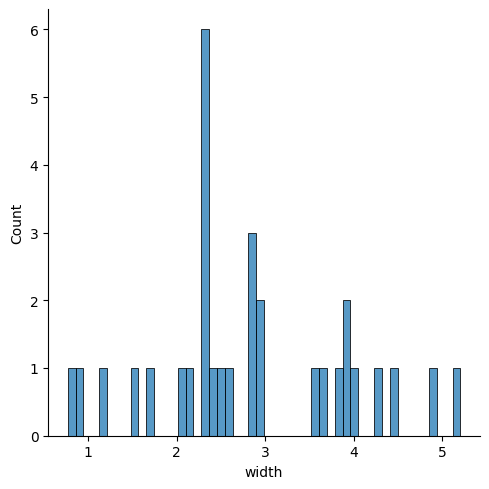

In [12]:
sns.displot(data=df, x='width', bins=50);

In [13]:
df[['APR', 'age', 'width']].corr()

,APR,age,width
APR,1.0000,-0.2740,-0.4822
age,-0.2740,1.0000,0.0295
width,-0.4822,0.0295,1.0000


In [14]:
df[['APR', 'log_age', 'width']].corr()

,APR,log_age,width
APR,1.0000,-0.5657,-0.4822
log_age,-0.5657,1.0000,0.0179
width,-0.4822,0.0179,1.0000


In [15]:
df[['log_apr', 'log_age', 'width']].corr()

,log_apr,log_age,width
log_apr,1.0000,-0.5611,-0.5384
log_age,-0.5611,1.0000,0.0179
width,-0.5384,0.0179,1.0000


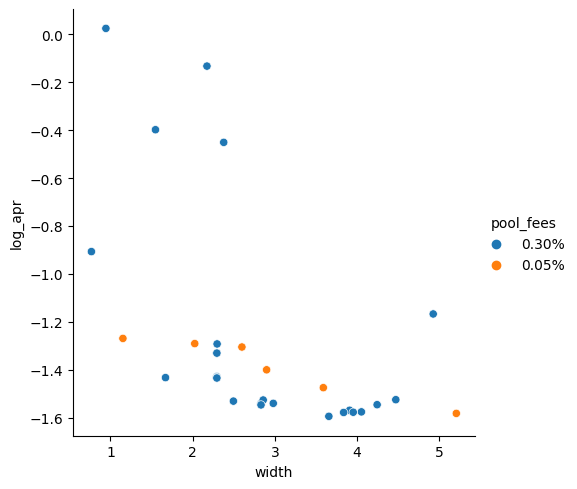

In [16]:
sns.relplot(data=df, x='width', y='log_apr', hue='pool_fees')

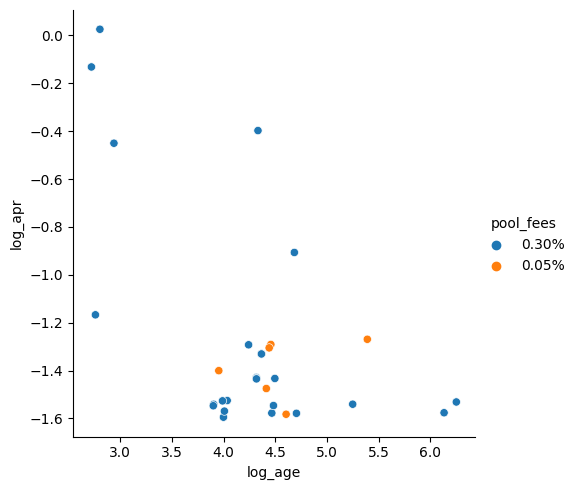

In [17]:
sns.relplot(data=df, x='log_age', y='log_apr', hue='pool_fees')

In [18]:
lm = smf.ols(formula='log_apr ~ width + log_age', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_apr   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     20.49
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.30e-06
Time:                        08:23:05   Log-Likelihood:                -3.9952
No. Observations:                  31   AIC:                             13.99
Df Residuals:                      28   BIC:                             18.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5935      0.313      1.894      0.069      -0.049       1.235
width         -0.2070      0.047     -4.388      0.000      -0.304      -0.110
log_age       -0.3001      0.066     -4.581      0.000      -0.434      -0.166
==============================================================================
Omnibus:                        3.078   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.723
Skew:                           0.700   Prob(JB):                        0.256
Kurtosis:                       2.616   Cond. No.                         32.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

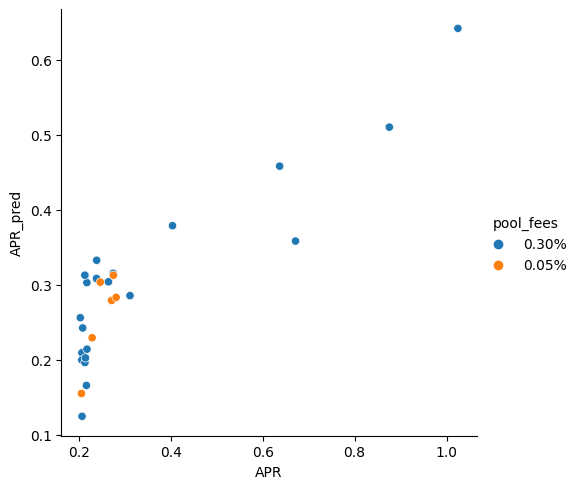

In [19]:
# compare predictions and observations
df['APR_pred'] = np.exp(lm.predict())
df['APR_minus_APR_pred'] = df.APR - df.APR_pred
sns.relplot(data=df, x='APR', y='APR_pred', hue='pool_fees');

#### Predict the APR of your LP position

In [21]:
# input
your_width = 0.2094  # upper limit price - lower limit price
your_pool_age = 20   # in days

newdata = pd.DataFrame({'width': [your_width], 'age': [your_pool_age]})
newdata['log_age'] = np.log(newdata.age)
your_apr = np.exp(lm.predict(newdata))[0]

print("Given a width of {} for your limit prices, linear regression predicts the APR (IL accounted) of your position will be {:.2%} if you provide liquidity for {} days.".format(your_width, your_apr, your_pool_age))

Given a width of 0.2094 for your limit prices, linear regression predicts the APR (IL accounted) of your position will be 70.55% if you provide liquidity for 20 days.
